In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time
import copy
from tqdm import tqdm

In [2]:
class Robot:
    
    def __init__(self, f, Id=0, rate=1.):
        
        self.Id = Id
        self.rate = rate
        self.Fitness = np.inf
        
        self.f = f
        
        self.r = np.random.uniform(-5,5)
              
    def Mutate(self):
        self.r += np.random.uniform(-self.rate,self.rate)
        
    def GetR(self):
        return self.r
    
    def SetFitness(self):
        
        self.Fitness = self.f(self.GetR())

In [3]:
# Funcion a minimizar
f = lambda x: x**2 + 10*np.sin(x)

In [4]:
def GetRobots(N):
    
    Robots = []
    
    for i in range(N):
        r = Robot(f=f,Id=i)
        Robots.append(r)
        
    return Robots

In [5]:
def Plotter(e):
    
    fig = plt.figure(figsize=(10,3))
    ax = fig.add_subplot(121)
    ax1 = fig.add_subplot(122)
        
    ax.set_title('Epoch={:.0f}'.format(e))
    
    return ax,ax1

In [7]:
def Genetic(Robots, epochs=50):
    
    # Solo para graficar la función de costo
    t = np.linspace(-5,5,50)
    
    # Guardar los más aptos
    N = int(0.5*len(Robots))
    
    # Epochs   
    for e in range(int(epochs)):
  

        # Actualizamos imformación de los robots
        for i,p in enumerate(Robots):
            p.Mutate()
            p.SetFitness()
        
        clear_output(wait=True)
        
        ax,ax1 = Plotter(e)
        ax.plot(t,f(t),'--',lw=2)
    
     
        for i, p in enumerate(Robots):          
            ax.scatter(p.GetR(),p.f(p.GetR()),marker='.',color='r',label='Id {}'.format(p.Id))   
     
        # Ordenamos los robots por fitness
        scores = [ (p.Fitness,p) for p in Robots ]
        #print(scores)
        scores.sort(  key = lambda x: x[0], reverse = False  )
        
        Temp = [r[1] for i,r in enumerate(scores) if i < N]
        
        # Copiado profundo
        for i,r in enumerate(Robots):
            j = i%N
            Robots[i] = copy.deepcopy(Temp[j])
        
        plt.show()
        
        time.sleep(0.001)

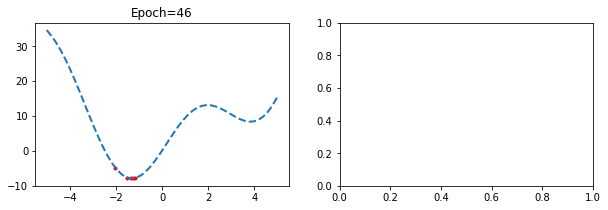

In [ ]:
Robots = GetRobots(5)
Genetic(Robots)